In [2]:
import numpy as np
import sympy, math
from sympy import I, latex, pi
from IPython.display import display, Latex
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Занятие 9
# Алгебра
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [ ]:
z1 = 5 * 3 ** sympy.S.Half + 5 * I
z2 = -3 + 3 * I
z3 = -1 + I
z4 = I
z5 = sympy.S(12) /13 + sympy.S(5) /13 * I

complex_numbers = []
for z in (z1  * z2, (z2 - 5 * z3) ** 6, (z4 / z3) ** sympy.S.Half, sympy.S(z1 ** 2 + z3) / (13 * z5 - 2 * z2)):
  complex_numbers.append(z.simplify())

display(*map(Latex, map(latex, map(sympy.expand_complex, complex_numbers))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание  2.
Вычисления Примера 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
z1 = complex(5 * 3 ** (1/2), 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(12/13, 5/13)
print(z1  * z2, (z2 - 5 * z3) ** 6, (z4 / z3) ** (1/2), (z1 ** 2 + z3) / (13 * z5 - 2 * z2), sep=', ')

(-40.98076211353316+10.980762113533157j), (-0+512j), (0.7768869870150187-0.32179712645279135j), (2.4442998757586336+5.002602236344583j)


### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

(-1.5, 1.5)

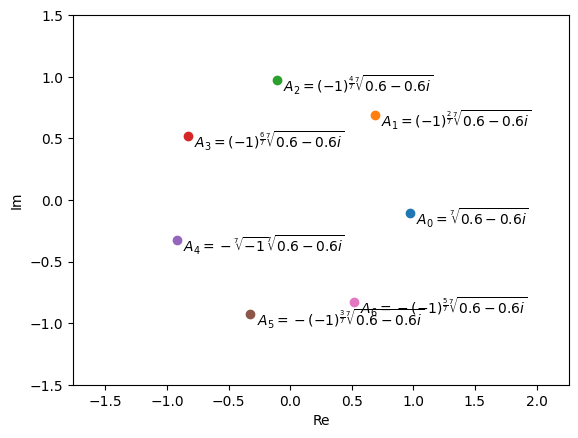

In [ ]:
n = 7
roots_list = [sympy.root(3/5 - 3/5 * I, n, k) for k in range(n)]

for x, y, k_complex_z in zip(map(sympy.re, roots_list),
                             map(sympy.im, roots_list),
                             enumerate(roots_list)):
  plt.scatter(x, y)
  k, complex_z = k_complex_z
  plt.annotate(f'$A_{k} = {sympy.latex(complex_z)}$',
               xy=(x, y),
               xytext=(x + 0.05, y - 0.10))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-4, 4.5)
plt.ylim(-1.5, 1.5)

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

(-9.5, 9.5)

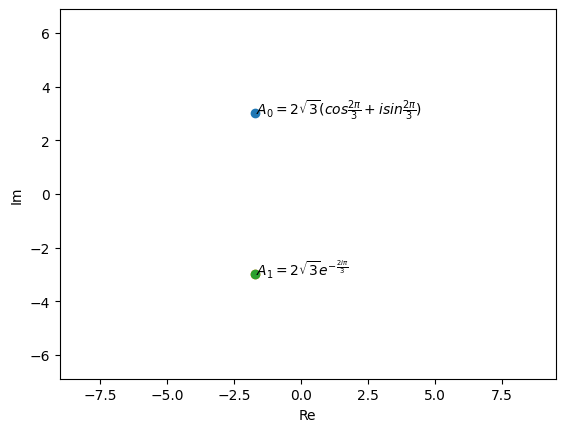

In [ ]:
z4 = -3 ** sympy.S.Half + 3 * I
z4_conjugate = sympy.re(z4) - I * sympy.im(z4)
roots = [z4, z4_conjugate]

def draw(z, k):
    r = sympy.functions.Abs(z)
    phi = sympy.functions.arg(z)
    x, y = sympy.re(z), sympy.im(z)
    plt.scatter(x, y)
    if k == 0:
      plt.annotate(f'$A_{k} = {sympy.latex(r)}(cos{sympy.latex(phi)} + i sin{sympy.latex(phi)})$',
                   xy=(x, y),
                   xytext=(x + 0.05, y - 0.05))
    else:
      plt.scatter(x, y)
      plt.annotate(f"$A_{k} = {sympy.latex(r * sympy.exp(I * phi))}$",
                   xy=(x, y),
                   xytext=(x + 0.05, y - 0.05))

draw(z4, 0)
draw(z4_conjugate, 1)

plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-9, 9.5)
plt.ylim(-9.5, 9.5)

#### Задание  5*.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел.

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$,
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$.

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность в формате float модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и преобразовывать результат в формат float).

Сравнение:


5**(1/4)*cos(pi/32) + 5**(1/4)*I*sin(pi/32)

False

-5**(1/4)*sin(pi/32) + 5**(1/4)*I*cos(pi/32)

False

-5**(1/4)*cos(pi/32) - 5**(1/4)*I*sin(pi/32)

False

5**(1/4)*sin(pi/32) - 5**(1/4)*I*cos(pi/32)

False

Аналитическое представление оказывается разным.


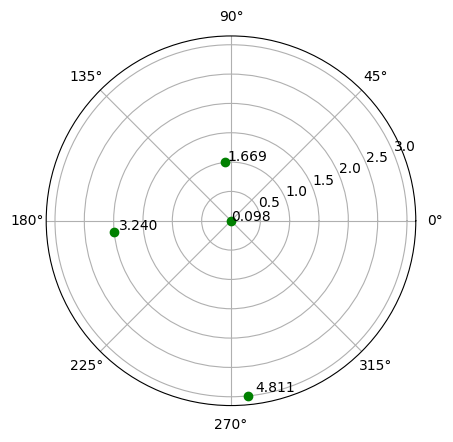

In [38]:
def to_trig(z, k, n):
    r = sympy.functions.Abs(z)
    phi = (sympy.functions.arg(z) + 2 * pi * k) / n
    return r * (sympy.cos(phi) + I * sympy.sin(phi))

z = 5 * (sympy.cos(pi/8) + I * sympy.sin(pi/8))
n = 4
roots = [5**(1/n) * (sympy.cos((pi/8 + 2*pi*k)/n) + I * sympy.sin((pi/8 + 2*pi*k)/n)) for k in range(n)]
roots_sympy = [sympy.expand_complex(sympy.root(5 * sympy.exp(I * pi/8), n, k)) for k in range(n)]

for k in range(n):
    phi = (np.pi / 8 + 2 * np.pi * k) / n
    plt.polar(phi, k, 'go')
    plt.annotate(f"{phi:.3f}", xy=(phi, k), xytext=(phi, k), textcoords='offset points')
plt.savefig('picture_task_5.png')

print('Сравнение:')
for i in range(n):
  display(roots_sympy[i])
  display(roots[i] == roots_sympy[i])
print('Аналитическое представление оказывается разным.')

#### Задание  6*.
Считать из файла "complex_numbers.xlsx" комплексные числа (откройте файл, обратите внимание на подписи строк и столбцов, имя листа).
Вывести на экран  считанные числа в алгебраической  форме, их модули и аргументы. Дописать в файл листы "abs" и "arg" с названиями строк в виде алгебраической формы комплексного числа (например, $2-3i$) и столбцом "abs" и "arg" соответсвенно со значениями модулей и аргументов чисел, округленными до 2 знаков после запятой. Округлять можно, например, с помощью round из Python.

**Указание:** построить по считанным из файла значениям вещественной и мнимой части комплексные числа sympy, вычислить приближенно их модули и аргументы средствами sympy, затем округлить.

In [35]:
# Скачиваем файл.
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

# Считываем файл.
table = pd.read_excel(file_name, sheet_name='a+ib')
Name_df = table['number'].tolist()
Re_df = table['re'].tolist()
Im_df = table['im'].tolist()

numbers = []
args = []
abss = []
# Вывод чисел из файла.
for i in range(len(Name_df)):
  z = complex(Re_df[i], Im_df[i])
  abs = round(float(sympy.functions.Abs(z)), 2)
  arg = round(float(sympy.functions.arg(z)), 2)
  numbers += [str(z)]
  args += [str(arg)]
  abss += [str(abs)]
  display(f'{Name_df[i]} = {z}; abs = {abs}; arg = {arg}')

Xarg = pd.DataFrame(args)
Xabs = pd.DataFrame(abss)
Xname = pd.DataFrame(numbers)
with pd.ExcelWriter(file_name, mode='a', if_sheet_exists='overlay') as writer:
    Xname.to_excel(writer, sheet_name='abs', index=False, startcol = 0)
    Xabs.to_excel(writer, sheet_name='abs', index=False, startcol = 1)
    Xname.to_excel(writer, sheet_name='arg', index=False, startcol = 0)
    Xarg.to_excel(writer, sheet_name='arg', index=False, startcol = 1)

Saving complex_numbers.xlsx to complex_numbers.xlsx
Загружен файл complex_numbers.xlsx


'z = (-1+2j); abs = 2.24; arg = 2.03'

'w = (3-5j); abs = 5.83; arg = -1.03'

'v = 4j; abs = 4.0; arg = 1.57'

't = (-3+0j); abs = 3.0; arg = 3.14'

### Индивидуальное задание.
Составить уравнение 3 степени с переменной $z$, корнями которого являются числа $z_1$, $z_2$ и $z_3$, вывести уравнение на экран (скобки должны быть раскрыты!).

Решить полученное уравнение с использованием sympy.roots.
Корни уравнения вывести на экран в алгебраической форме.

Преобразовать **полученные** корни уравнения в комплексные числа Python (не sympy!), вывести на экран комплексно-сопряженные к ним числа.

Затем вывести на экран на отдельной строчке модули всех чисел и на отдельной строчке аргументы, все числа округлить до 3 знаков после запятой, т.е. не более 3 знаков после запятой.


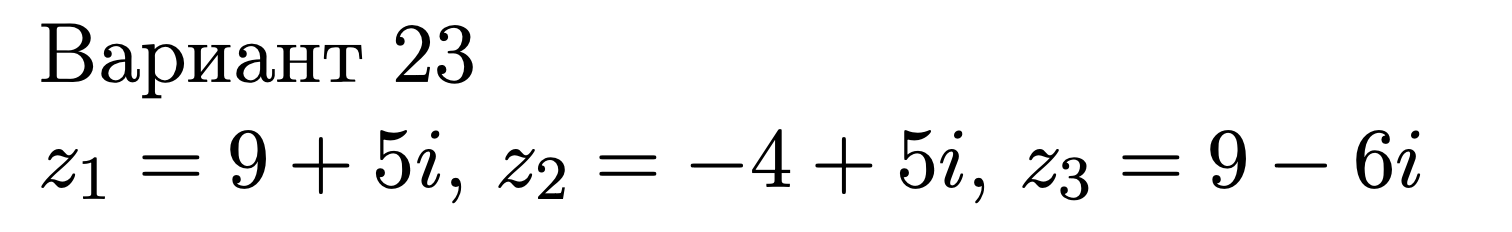

In [ ]:
z1 = 9 + 5 * I
z2 = -4 + 5 * I
z3 = 9 - 6 * I
z = sympy.Symbol('z')
eq = (z - z1) * (z - z2) * (z - z3)
eq = sympy.expand(sympy.Eq(eq, 0))

display(eq)
print()
solve_eq = sympy.roots(eq)

all_numbers = []
conjugates = []
display(Latex('\\text{{Корни\ уравнения:}}'))
for i in solve_eq:
  display(i)
  z_root = complex(i)
  all_numbers += [z_root]
  conjugates += [abs(z_root ** 2) / z_root]

display(Latex('\\text{{Сопряжённые:}}'))
for i in roots_python:
  display(i)
print()

all_numbers += conjugates
abs_z = set(round(float(sympy.functions.Abs(z_)), 3) for z_ in all_numbers)
phi_z = set(round(float(sympy.functions.arg(z_)), 3) for z_ in all_numbers)

display(Latex('\\text{{Abs:}}'))
for i in abs_z:
  display(i)
print()

display(Latex('\\text{{Arg:}}'))
for i in phi_z:
  display(i)

Eq(z**3 - 14*z**2 - 4*I*z**2 + 44*z + 85*I*z + 399 - 591*I, 0)

<IPython.core.display.Latex object>

9 + 5*I

-4 + 5*I

9 - 6*I

<IPython.core.display.Latex object>

(9-5j)

(-4.000000000000001-5j)

(9+6j)

<IPython.core.display.Latex object>

10.296

10.817

6.403

<IPython.core.display.Latex object>

0.507

-0.588

2.246

-0.507

0.588

-2.246